In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
data_path = 'iris.csv'
df = pd.read_csv(data_path)


In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [4]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
# Dropping rows with missing values
df.dropna(inplace=True)

In [6]:
# Encoding categorical target variable
if df['Species'].dtype == 'object':
    le = LabelEncoder()
    df['Species'] = le.fit_transform(df['Species'])

In [7]:
# Splitting features and target variable
X = df.drop(columns=['Species'])
y = df['Species'] 

In [8]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

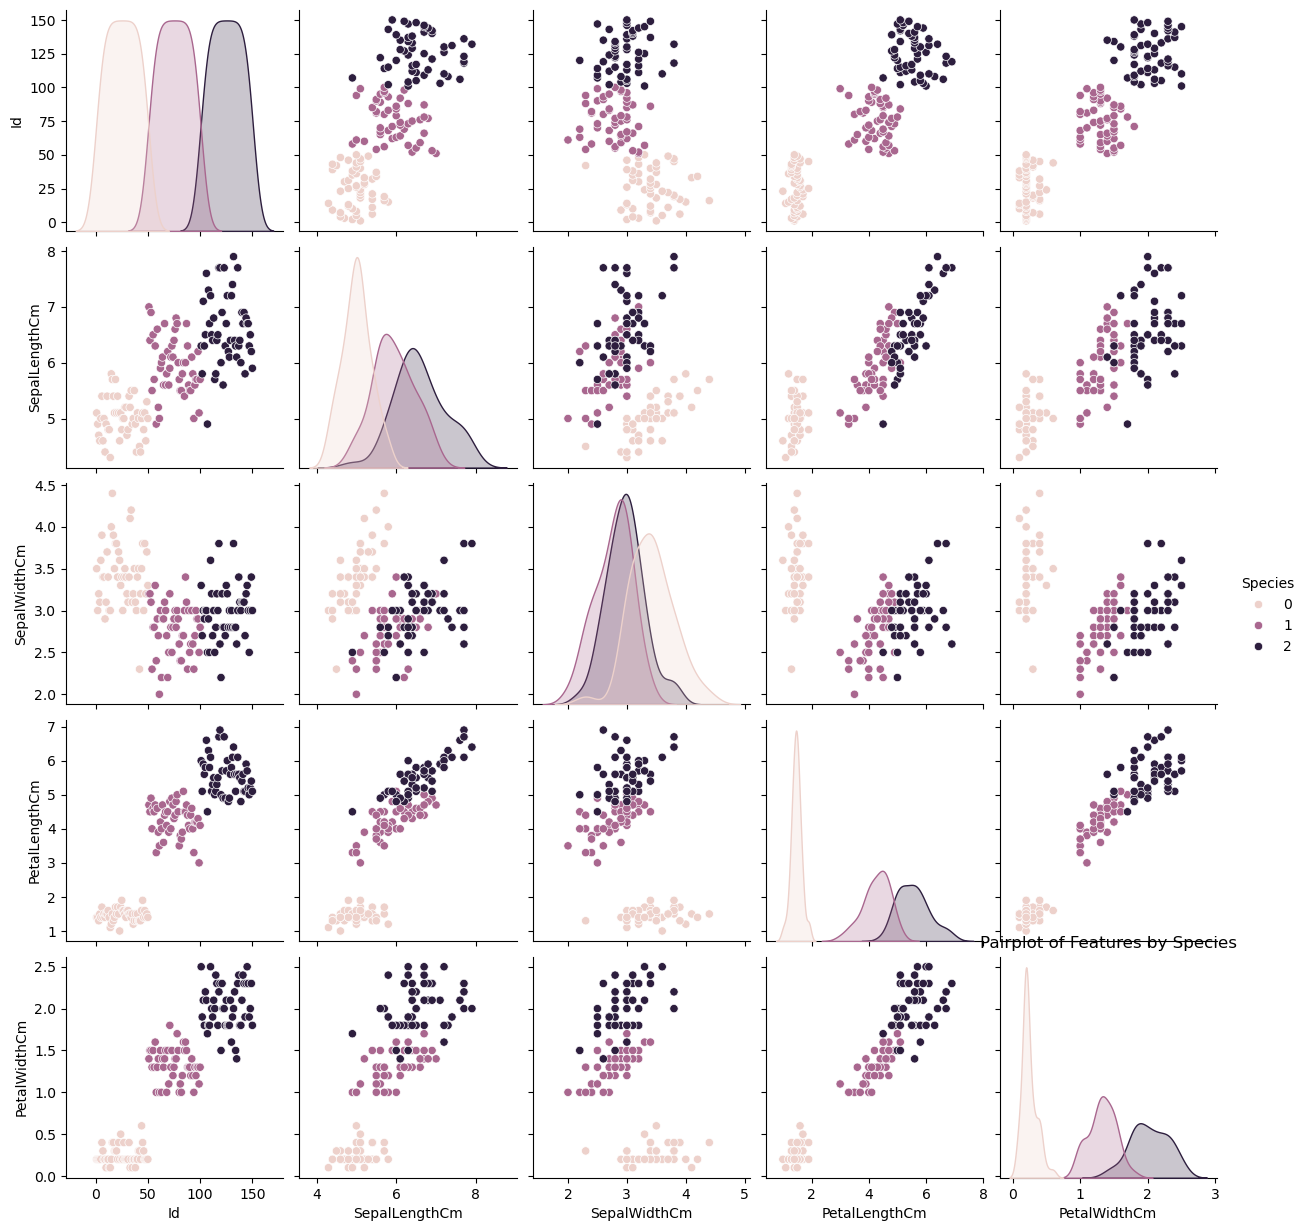

In [9]:
sns.pairplot(df, hue='Species', diag_kind='kde')
plt.title("Pairplot of Features by Species")
plt.show()

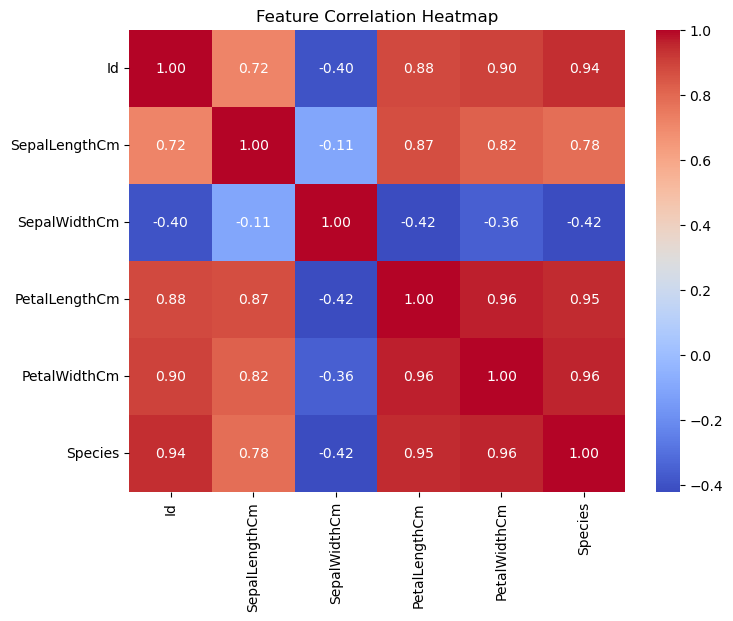

In [10]:
# Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

1. **Title**: "Feature Correlation Heatmap" - Visualizes the correlation between different features in a dataset.

2. **Features**: Includes "SepalLengthCm," "SepalWidthCm," "PetalLengthCm," "PetalWidthCm," and "Species."

3. **Correlation Values**: Ranges from -1.00 to 1.00, where values close to 1 indicate strong positive correlation, and values close to -1 indicate strong negative correlation.

4. **Strong Correlations**: 
   - "PetalLengthCm" and "PetalWidthCm" show high positive correlation (0.96).
   - "Species" is highly correlated with "PetalLengthCm" (0.95) and "PetalWidthCm" (0.96).

5. **Weak/Negative Correlations**: 
   - "SepalWidthCm" has weak or negative correlations with other features, such as -0.42 with "PetalLengthCm" and "PetalWidthCm."

6. **Insight**: The heatmap helps identify relationships between features, highlighting which features are strongly related and which are not.

In [12]:
# Split dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [13]:

models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    }
}

In [14]:
# Perform GridSearch for each model

best_estimators = {}
for name, config in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_:.4f}")


Training RandomForest...
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy for RandomForest: 1.0000
Training SVM...
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy for SVM: 1.0000


In [15]:
# Evaluate best models on test set

for name, model in best_estimators.items():
    print(f"\nEvaluating {name} on the test set...")
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))




Evaluating RandomForest on the test set...
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Evaluating SVM on the test set...
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  